<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Feature Engineering Techniques on "Titanic - Machine Learning from Disaster" dataset** </center>
You can download the dataset from here: https://www.kaggle.com/competitions/titanic/data 

or you can directly use this url: https://drive.google.com/uc?export=download&id=1yGsY0HDF4UsV4pG5YEtT4zfr4FfIqsKV

This is the legendary Titanic ML dataset – the best, first challenge for you to dive into ML competitions and in this assignment, you will work with actual dataset that'll give you feel/experience of real-world related work. 

## What is Feature Engineering? 
(reference: https://youtu.be/BL-Q3nca9c4)

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used by our machine learning model. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches. The goal of Feature Engineering is simplifying and speeding up data transformations while also enhancing model accuracy.

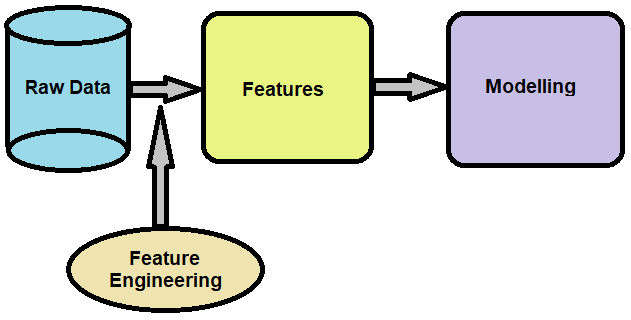

## Importance Of Feature Engineering
Feature Engineering is a very important step in machine learning. Feature engineering refers to the process of designing artificial features into an algorithm. These artificial features are then used by that algorithm in order to improve its performance, or in other words reap better results. Data scientists spend most of their time with data, and it becomes important to make models accurate.

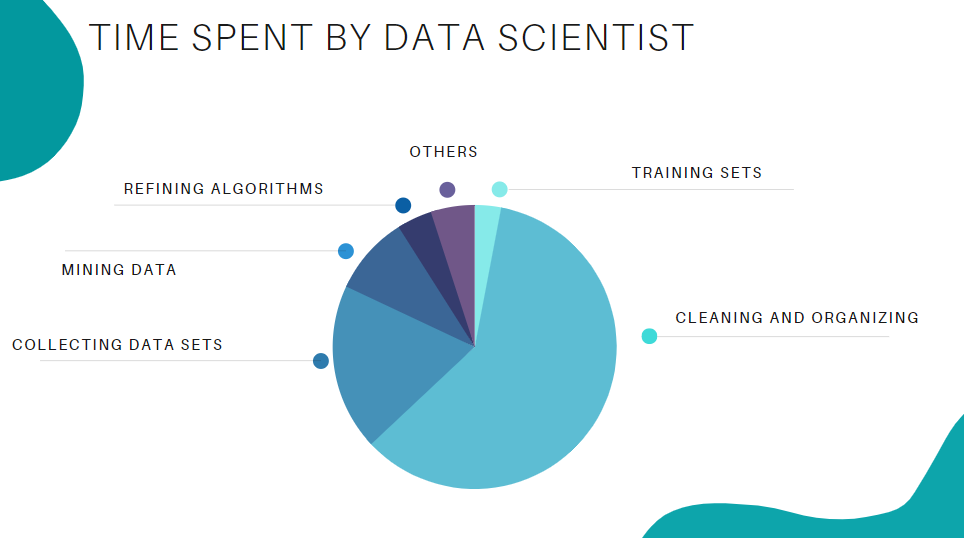

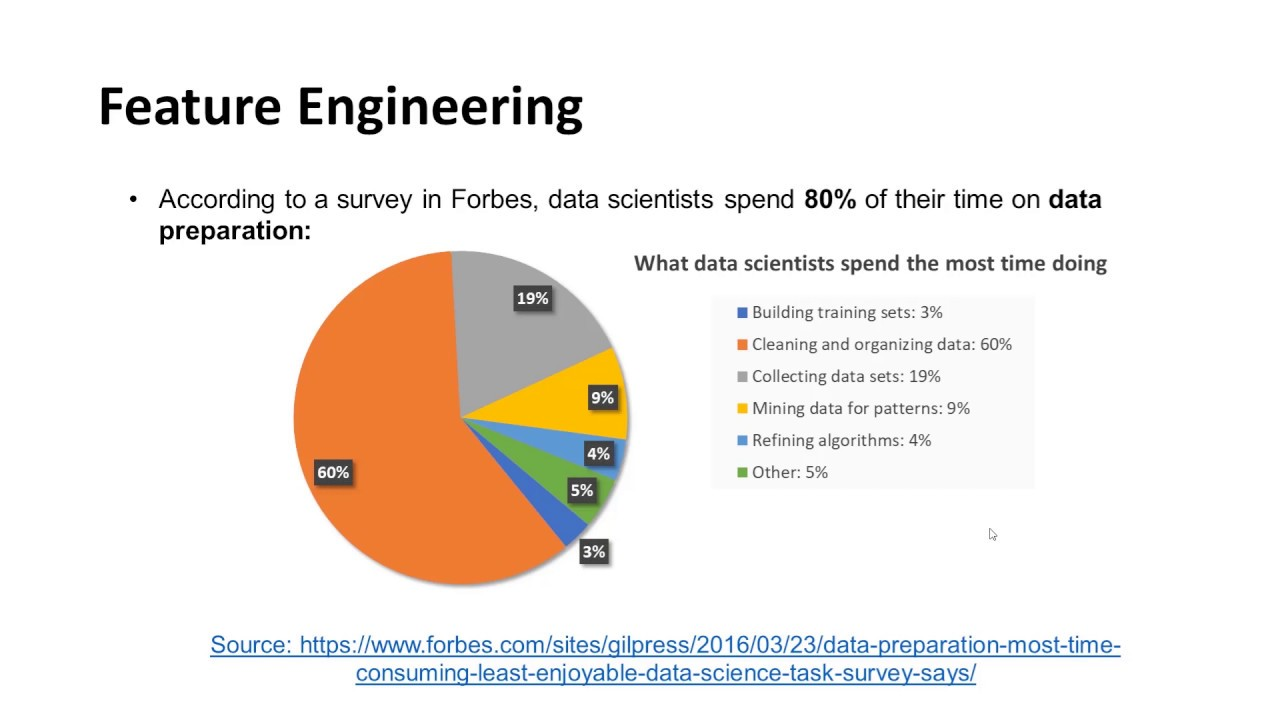

Data Scientists spend more than 80% time on data preparation. When feature engineering activities are done correctly, the resulting dataset is optimal and contains all of the important factors that affect the business problem. As a result of these datasets, the most accurate predictive models and the most useful insights are produced.

List of techniques that we are going to discuss in this assignment are:
- Imputation
- Handling Outliers
- Feature Creation
- Binning
- Variable Transformation
- Scaling
- One-Hot Encoding

So, let's get started with feature engineering techniques on titanic dataset.

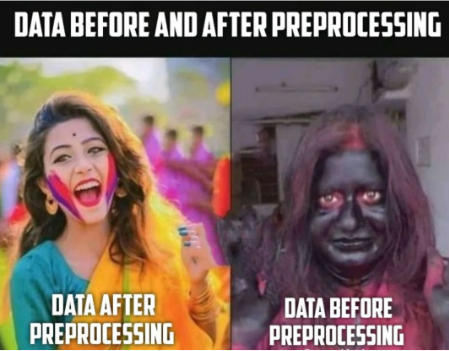

In [ ]:
# importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
# import the dataset and read it
url = "https://drive.google.com/uc?export=download&id=1yGsY0HDF4UsV4pG5YEtT4zfr4FfIqsKV"
df = pd.read_csv(url)
''' or
df = pd.read_csv('titanic.csv')
'''
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Imputation 
(reference: https://youtu.be/1kgDN3AMokI)

When it comes to preparing your data for machine learning, missing values are one of the most typical issues. Human errors, data flow interruptions, privacy concerns, and other factors could all contribute to missing values. Missing values have an impact on the performance of ML models for whatever cause. 

The main goal of imputation is to handle these missing values. Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.  


In [ ]:
# check the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Dropping rows with null values

The easiest and quickest approach to a missing data problem is dropping the offending entries. This is an acceptable solution if we are confident that the missing data in the dataset is missing at random, and if the number of data points we have access to is sufficiently high that dropping some of them will not cause us losing information in the data for the models we build.

Dropping too much data is also dangerous. For example, for this titanic dataset we might not want to simply blindly drop everything, as this would result in very few samples left as we already have very small dataset. There will be nothing left for machine learning model to learn from.

Pros:
- Complete removal of data with missing values results in robust and highly accurate model
- Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

Cons:
- Loss of information and data
- Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

In [ ]:
# drop the missing values
new_df = df.dropna()

In [ ]:
# check the null values
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# compare the length of dataframe before and after dropping null values
len(df), len(new_df)

(891, 183)

#### Drop the column
When we have a lot of missing values, say more than a certain threshold, we can easliy drop the column. 

Let us see it in our dataset, Suppose we choose our threshold to be 0.75. That means if any column has more than 75% of missing values, we can drop it.

In [ ]:
# set threshold of 0.75 and accept only those columns which have null values less than threshold
threshold = 0.75
df = df[df.columns[df.isnull().mean() < threshold]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see that now, cabin column is dropped as it had 687 missing values which is a lot for any column and it would have affect the performance of our model.

#### Numerical Imputation
Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values. We suggest beginning with considering a possible default value of missing values in the column. For example, if you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. For another example, if you have a column that shows the “customer visit count in last month”, the missing values might be replaced with 0 as long as you think it is a sensible solution.

In other cases, the best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

Let's see this with respect to the example of Age column of our data.

In [ ]:
# Filling missing values with medians of Age column
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We could have also filled the column with mean() or mode() but median() fits better considering this column. Whenever needed, we can also apply mean() or mode() to fill missing values.

In [ ]:
# check the missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Categorical Imputation
Replacing the missing values with the maximum occurred value in a column is a good option as well for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

In [ ]:
# Max fill function for categorical columns
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
# check the missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

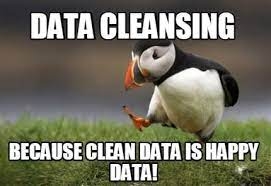

### 2. Handling Outliers 
(reference: https://youtu.be/bLkwYKdS8tY)

Outlier Handling is a technique for removing outliers from a dataset. An outlier is a data point that differs significantly from other observations. 

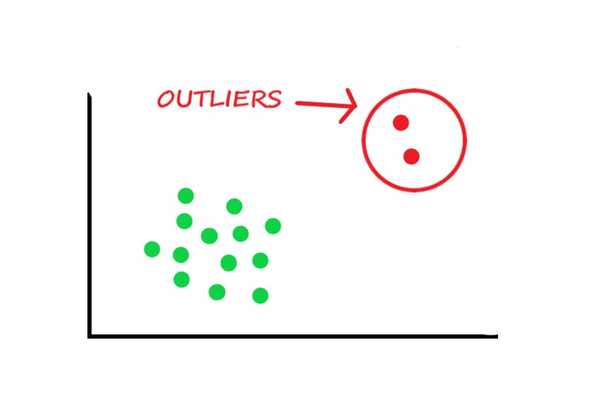



Outlier Handling can be used on a variety of scales to produce a more accurate data representation. This has an impact on the model’s performance. Depending on the model, the effect could be large or minimal; for example, linear regression is particularly susceptible to outliers. This procedure should be completed prior to model training. The various methods of handling outliers include:
- Removal: Outlier-containing entries are deleted from the distribution. However, if there are outliers across numerous variables, this strategy may result in a big chunk of the datasheet being missed.
- Replacing values: Alternatively, the outliers could be handled as missing values and replaced with suitable imputation.
- Capping: Using an arbitrary value or a value from a variable distribution to replace the maximum and minimum values.
- Discretization : Discretization is the process of converting continuous variables, models, and functions into discrete ones. This is accomplished by constructing a series of continuous intervals (or bins) that span the range of our desired variable/model/function.

In our dataset, we will first work with removing the outliers because the outliers affect our model performance and disturbs the learning. 


#### Standard Deviation based method to detect outliers
In the standard deviation method, we consider all the points with values more than or less than the 3(generally) times standard deviation from mean are considered outliers. 

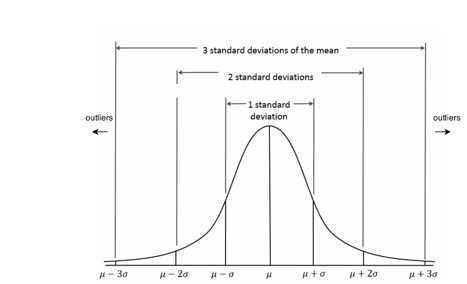

In [ ]:
# check the lenght of dataset
len(df)

891

In [ ]:
# Dropping the outlier rows with standard deviation, setting the limit
factor = 3
upper_lim = df['Fare'].mean() + df['Fare'].std() * factor
lower_lim = df['Fare'].mean() - df['Fare'].std() * factor

In [ ]:
# eliminate the outliers
new_df = df[(df['Fare'] < upper_lim) & (df['Fare'] > lower_lim)]

In [ ]:
# check the difference in lenght of dataset now
print(len(new_df))

871


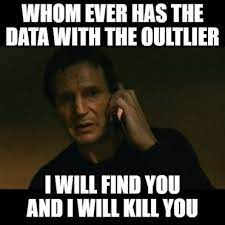

#### Caping the Outliers
Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.

In [ ]:
# check the extremes i.e min and max of Fare column
df["Fare"].min(), df["Fare"].max()

(0.0, 512.3292)

So, in this method, we set the values of a lower and higher percentile. A quantile is called a percentile when it is based on a 0-100 scale. The 0.95-quantile is equivalent to the 95-percentile and is such that 95 % of the sample is below its value and 5 % is above. 

We will set upper limit of 0.95-quantile and 0.05-quantile for lower limit for outliers, meaning any sample below or above the limit is an outlier. When we encontour any outlier, we substitute its value with our upper limit if the outlier lies above upper limit and substitute its value with our lower limit if the outlier lies below lower limit.


In [ ]:
# Capping the outlier rows with Percentiles
upper_lim = df['Fare'].quantile(0.95)
lower_lim = df['Fare'].quantile(0.05)
df.loc[(df['Fare'] > upper_lim),'Fare'] = upper_lim
df.loc[(df['Fare'] < lower_lim),'Fare'] = lower_lim

In [ ]:
# check the extremes i.e min and max of Fare column
df["Fare"].min(), df["Fare"].max()

(7.225, 112.07915)

In [ ]:
# check the lenght of dataset
len(df)

891

### 3. Feature Creation
Preprocessing is all about changing raw data into something that will help you improve the performance of your model. But you must be thinking how can we create own Feature and will it help increase the performance of my model ?

Creating features involves identifying the variables that will be most useful in the predictive model. This is a subjective process that requires human intervention and creativity.

Example, in the dataset, if we see, for a person in record, sibsp	tells us about number of siblings/spouses aboard the Titanic and parch tells us about of parents/children aboard the Titanic. Perhaps people traveling alone did better? Or on the other hand perhaps if you had a family, you might have risked your life looking for them, or even giving up a space up to them in a lifeboat. 

So, feature creation is the process of constructing new features from existing data to train a machine learning model. Let's implement the above statement for our data.

In [ ]:
# Create new family_size column
df['family_size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### 4. Binning

Data binning is a data pre-processing method used to minimize the effects of small observation errors which tends to improve the model performance applying domain knowledge. Binning is done to create bins for continuous numerical variables where they are converted to categorical variables. 

The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets. It also helps in avoiding the effects of outliers as we are grouping them into one special group.


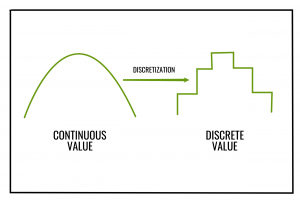

Suppose we want to perform binning on age groups in our dataset because more than numerical age, what kind of people(based on their age like old, children or adult) is more important for us to know in order to understant what patterns are going on to build the model. Maybe, Children and Old were given priority to sit in lifeboat, so there chances of survival are more. So, let's see how we can use binning in such case.

If age < 18, then children.

If age > 18 and less than 50.

And if age > 50 then old.

In [ ]:
# perform binning for different age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,50,100], labels=["Children", "Adult", "Old"])
df['Age_Group'].value_counts()

Adult       688
Children    139
Old          64
Name: Age_Group, dtype: int64

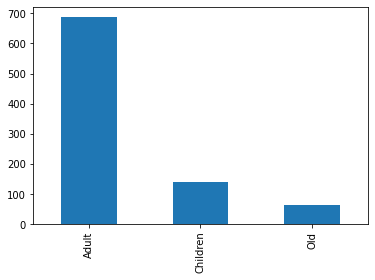

In [ ]:
# plot the bar graph showing different age groups
df['Age_Group'].value_counts().plot.bar()

### 5. Variable Transformation
**What is a Normal Distribution?**

Normal distribution is a widely used probability and statistical concept where mean, median and mode of such distribution have the same value and it can be defined with just two parameters: mean and variance. 

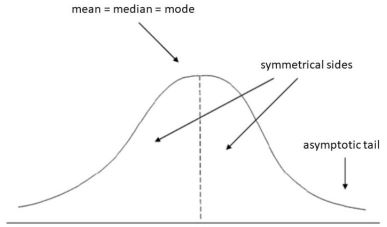


Some Machine Learning models, like linear and logistic regression, assume that the variables follow a normal distribution. More likely, variables in real datasets will follow more a skewed distribution.

A skewed distribution is neither symmetric nor normal because the data points cluster more toward one side of the scale than the other creating a curve where there is no such mirror imaging.

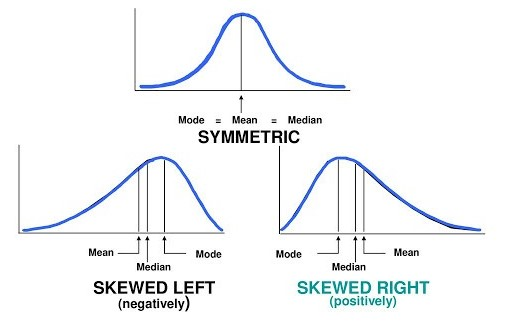

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation for such skewed distributions so that the transformed variable is Normal. Normally distributed variables many times boost the machine learning algorithm performance.

The most commonly-used methods to transform variables are the following:

1. Logarithm transformation – log(x)
2. Square root transformation – sqrt(x)
3. Reciprocal transformation – 1 / x
4. Exponential transformation – exp(x)

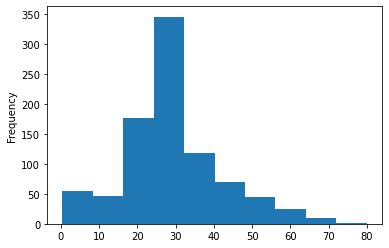

In [ ]:
# check the distribution for "family_size" column using histogram
df['Age'].plot.hist()

We can observe that this is left skewed distribution. Let's apply the transformation techniques and compare it before and after transformation.

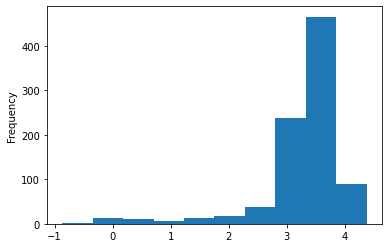

In [ ]:
# Apply Logarithm transformation
df['Age_log'] = np.log(df.Age)
df['Age_log'].plot.hist()

We can observe here that logarithmic transformation did not produce a Normal distribution for Age column, instead it created a right skewed distribution.



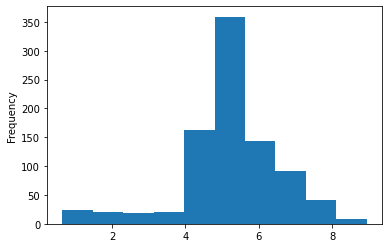

In [ ]:
# Apply Square root transformation
df['Age_sqr'] =df.Age**(1/2)
df['Age_sqr'].plot.hist()

This is a better but not perfect as it is still slightly right(or positively) skewed.

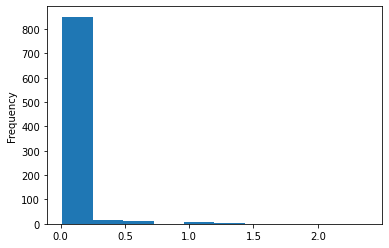

In [ ]:
# Apply Reciprocal transformation
df['Age_reciprocal'] = 1 / df.Age
df['Age_reciprocal'].plot.hist()

This transformation is also not useful to transform Age into a  normally distributed variable.



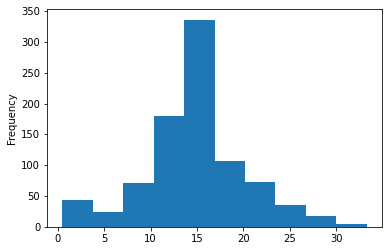

In [ ]:
# Apply Exponential transformation
df['Age_exp'] = df.Age**(4/5)
df['Age_exp'].plot.hist()

This one is the best of all the transformations above, which is also normal distribution for our variable(or column).

### 6. Scaling
Feature scaling is one of the most universal and difficult problems in machine learning, yet it’s one of the most important things to get right. In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, we don't expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared? 

Due to higher range, machine learning models create bias towards income column, but we want to examine each feature equally. If not scale, the feature with a higher value range starts dominating when calculating distances

After a scaling operation, the continuous features become similar in terms of range. Although this step isn’t required for many algorithms, it’s still a good idea to do so.

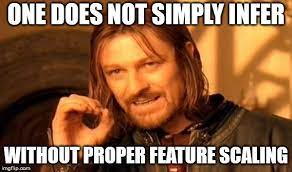

There are two common ways for scaling :

1. Normalization : All values are scaled in a specified range between 0 and 1 via normalisation (or min-max normalisation). This modification has no influence on the feature’s distribution, however it does worsen the effects of outliers due to lower standard deviations. As a result, it is advised that outliers be dealt with prior to normalisation. \\
$$ Xnorm = (X - Xmin) / (Xmax - Xmin) $$

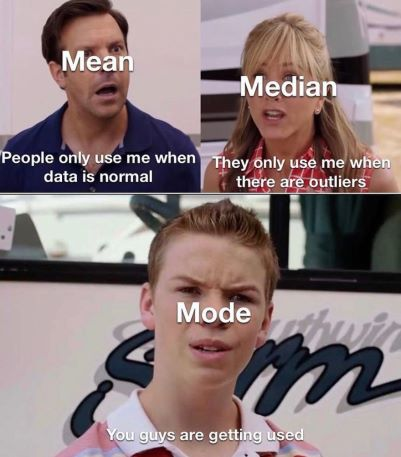

In [ ]:
# normalize the Age column
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df["Age"].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64

2. Standardization: Standardization (also known as z-score normalisation) is the process of scaling values while accounting for standard deviation. If the standard deviation of features differs, the range of those features will likewise differ. The effect of outliers in the characteristics is reduced as a result. To arrive at a distribution with a 0 mean and 1 variance, all the data points are subtracted by their mean and the result divided by the distribution’s variance. \\
$$ Z = (X - Xmean) / sigma; $$

$$ where\ sigma = standard\ deviation $$

In [ ]:
# standardize the Fare column
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
df["Fare"].head()

0   -0.707851
1    1.491633
2   -0.684665
3    0.867054
4   -0.680372
Name: Fare, dtype: float64

### 7. One-Hot Encoding 
(reference: https://youtu.be/5wcMiyVulSU)

Categorical data are variables that contain label values rather than numeric values. Example, A “pet” variable can have values: “dog” and “cat“ or a “color” variable can have values “red“, “green” and “blue“. Some algorithms can work with categorical data directly but many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form.

#### How to Convert Categorical Data to Numerical Data? 

One-Hot Encoding changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information. 

If you have N distinct values/classes in the categorical column, it is enough to map them to N-1 binary columns. So, One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. The categorical variable is removed and a new binary variable is added for each unique categorical value.

Let's see the example of color column we used in example above, what happens when we apply one-hot encoding to this categorical column. 

 

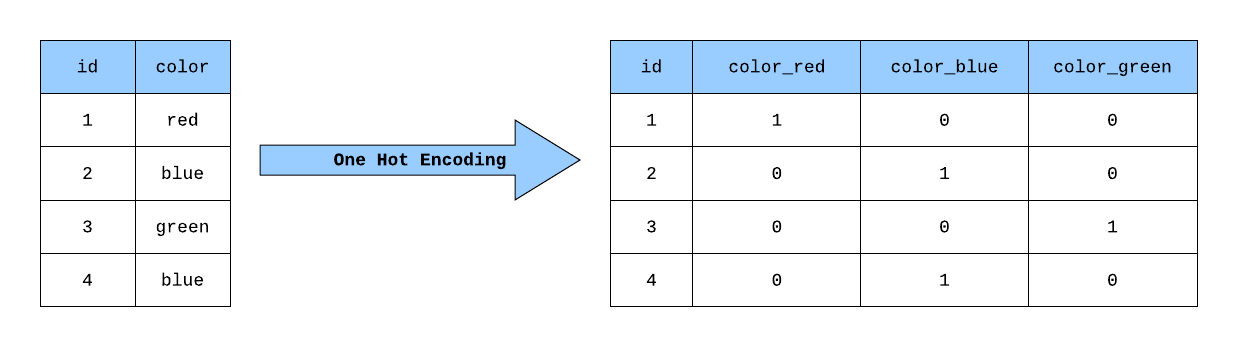

The values in the original data are Red, Yellow and Green. We create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.

Pandas get dummies makes this very easy! Pandas get dummies(pd.get_dummies()) allows you to easily one-hot encode your categorical data.

In [ ]:
# Apply One-Hot Encoding on Embarked and Sex column using pandas get_dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,family_size,Age_Group,Age_log,Age_sqr,Age_reciprocal,Age_exp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,-0.707851,1,Adult,3.091042,4.690416,0.045455,11.855999,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,1.491633,1,Adult,3.637586,6.164414,0.026316,18.358064,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,-0.684665,0,Adult,3.258097,5.099020,0.038462,13.551229,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.867054,1,Adult,3.555348,5.916080,0.028571,17.189151,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,-0.680372,0,Adult,3.555348,5.916080,0.028571,17.189151,0,1,0,0,1


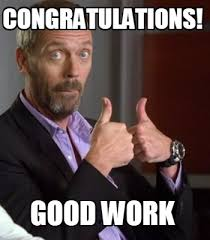



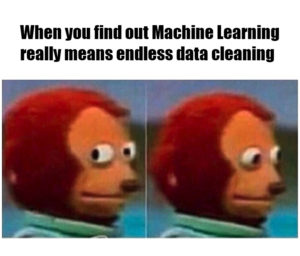

**Congratulations! You have completed Feature Engineering module on famous Titanic machine learning dataset.**

You have mastered the art of Feature Engineering of Data Analytics. Well done, you have been a great learner! 

We ensure to commit to our learners and appreciate every kind of feedback. Please fill the feedback form and we'll be happy to help you. 



Till then, a glimpse of the future:


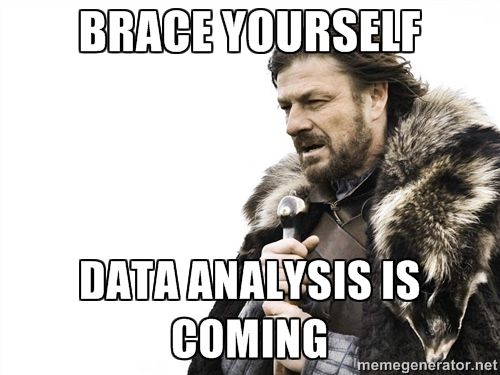

See you in next Assignment.